**Задача:**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# Часть 1. Приоритизация гипотез

В файле `hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

**Описание данных**

Файл `hypothesis.csv`
- `Hypothesis` — краткое описание гипотезы
- `Reach` — охват пользователей по 10-балльной шкале
- `Impact` — влияние на пользователей по 10-балльной шкале
- `Confidence` — уверенность в гипотезе по 10-балльной шкале
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы

**План**
- Применить фреймворк `ICE` для приоритизации гипотез и отсортировать их по убыванию приоритета
- Применить фреймворк `RICE` для приоритизации гипотез и отсортировать их по убыванию приоритета
- Посмотреть, как изменится приоритизация гипотез при применении RICE вместо ICE

### Загрузка данных

In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from datetime import datetime
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [289]:
hyp = pd.read_csv(r'C:\Users\564\Downloads\hypothesis.csv')

hyp.info()
hyp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


**Для расчета приоритизации гипотез будем использовать формулы ниже:**

\begin{equation}
𝐼𝐶𝐸 = \frac{𝐼𝑚𝑝𝑎𝑐𝑡 * 𝐶𝑜𝑛𝑓𝑖𝑑𝑒𝑛𝑐𝑒}
{𝐸𝑓𝑓𝑜𝑟𝑡𝑠}
\end{equation}

\begin{equation}
𝑅𝐼𝐶𝐸 = \frac{𝑅𝑒𝑎𝑟𝑐ℎ * 𝐼𝑚𝑝𝑎𝑐𝑡 * 𝐶𝑜𝑛𝑓𝑖𝑑𝑒𝑛𝑐𝑒}
{𝐸𝑓𝑓𝑜𝑟𝑡𝑠}
\end{equation}

### Применим фреймворк ICE для приоритизации гипотез

In [290]:
hyp['ICE'] = hyp['Impact'] * hyp['Confidence'] / hyp['Efforts']
pd.set_option('display.max_colwidth', 999)
hyp.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


### Применим фреймворк RICE для приоритизации гипотез

In [291]:
hyp['RICE'] = hyp['Reach'] * hyp['Impact'] * hyp['Confidence'] / hyp['Efforts']
pd.set_option('display.max_colwidth', 999)
hyp.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


**Вывод:**

Благодаря добавлению параметра Reach, гипотезы с высоким охватом пользователей получили более высокий приритет. Прежние позиции сохранили только гипотезы под номерами 6 и 4.

# Часть 2. Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах `orders.csv` и `visitors.csv`.

**Описание данных**

Файл `orders.csv`
- `transactionId` — идентификатор заказа
- `visitorId` — идентификатор пользователя, совершившего заказ
- `date` — дата, когда был совершён заказ
- `revenue` — выручка заказа
- `group` — группа A/B-теста, в которую попал заказ

Файл `visitors.csv`
- `date` — дата
- `group` — группа A/B-теста
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

**План**
- Провести обзорный анализ данных
- Проанализировать A/B-тест

## Обзорный анализ данных

In [292]:
orders = pd.read_csv(r'C:\Users\564\Downloads\orders.csv')

orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [293]:
visitors = pd.read_csv(r'C:\Users\564\Downloads\visitors.csv')

visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [294]:
# Проверка на явные дубликаты

print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0


In [295]:
# Проверка на неявные дубликаты в таблице visitors

print('Содержимое столбца group:', visitors['group'].unique())
print('Количество дней:', visitors['date'].nunique())

date_group = visitors.groupby('date').agg({'group': 'nunique'})
date_group[date_group == 2].count()

Содержимое столбца group: ['A' 'B']
Количество дней: 31


group    31
dtype: int64

In [296]:
# Проверка на неявные дубликаты в таблице orders

orders['group'].unique()

array(['B', 'A'], dtype=object)

In [297]:
# Ищем пользователей попавших в обе тестовые группы

visitors_group = orders.groupby('visitorId').agg({'group': 'nunique'})
visitors_group = visitors_group[visitors_group > 1].dropna()
visitors_group.head()

,group
visitorId,
8300375,2.0
199603092,2.0
232979603,2.0
237748145,2.0
276558944,2.0


In [298]:
# Удаляем из таблицы orders пользователей попавших в обе группы

orders = orders[np.logical_not(orders['visitorId'].isin(visitors_group.index))]

**Выводы:**

- Пропусков и явных дубликатов нет, но тип данных в столбце date нужно будет заменить на datetime
- Пользователи по ошибке попавшие в обе группы были удалены из таблицы orders

## Анализ A/B-теста

### Построим график кумулятивной выручки по группам

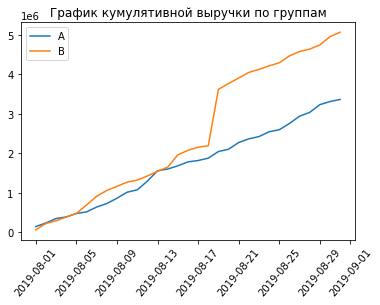

In [299]:
# преобразуем тип данных в datetime
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.legend()
plt.xticks(rotation=50)
plt.show()

**Вывод:**

На графике кумулятивной выручки наблюдается аномально резкий рост за короткий промежуток времени у группы B

### Построим график кумулятивного среднего чека по группам

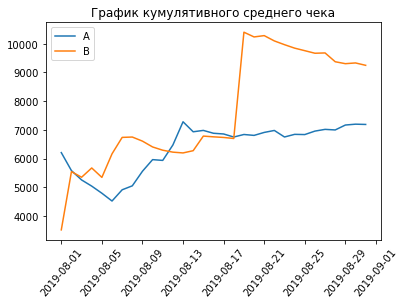

In [300]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека')
plt.legend()
plt.xticks(rotation=50)
plt.show()

**Вывод:**

На графике кумулятивного среднего чека наблюдается еще более аномальный рост у группы B. Вероятно, в данных имеются крупные выбросы

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

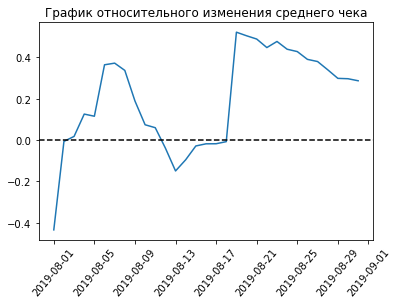

In [301]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения среднего чека')
plt.xticks(rotation=50)
plt.show()

**Вывод:**

Результаты теста резко менялись в некоторые дни. Вероятно, это было влияние отдельных крупных заказов

### Построим график кумулятивной конверсии по группам

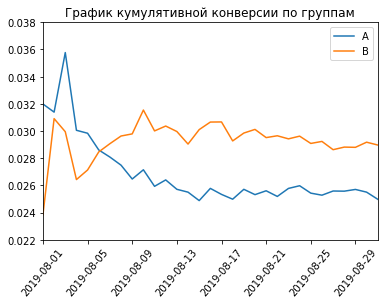

In [302]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам')

# задаем масштаб осей
plt.axis([np.datetime64('2019-08-01'), np.datetime64('2019-08-31'), 0.022, 0.038])
plt.xticks(rotation=50)
plt.show()

**Вывод:**

Группа B стабильно демонстрирует более высокую конверсию

### Построим график относительного изменения кумулятивной конверсии группы B к группе A

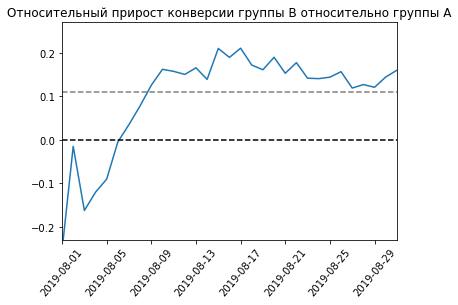

In [303]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],
                              left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']
                                             /mergedCumulativeConversions['conversionA']-1)
plt.title('Относительный прирост конверсии группы B относительно группы A')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.11, color='grey', linestyle='--')

plt.axis([np.datetime64('2019-08-01'), np.datetime64('2019-08-31'), -0.23, 0.27])
plt.xticks(rotation=50)
plt.show()

В начале теста группа B сильно колеблилась, но затем начала стабилизироваться выше отметки в 0.11

### Построим точечный график количества заказов по пользователям

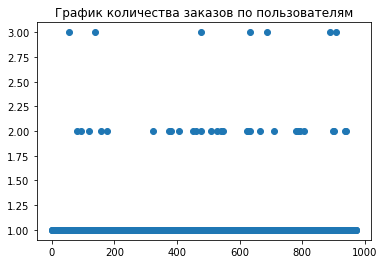

In [304]:
og = orders.groupby(by='visitorId').agg({'transactionId' : 'count'})
x_values = pd.Series(range(0, len(og)))

plt.scatter(x_values, og['transactionId'])
plt.title('График количества заказов по пользователям')
plt.show()

Подавляющее большинство пользователей сделали 1-2 заказа, что неудивительно для временного промежутка в 1 месяц

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [305]:
print(np.percentile(og['transactionId'], [95, 99]))

[1. 2.]


Более 2 заказов на одного пользователя будем рассматривать как аномалию

### Построим точечный график стоимостей заказов

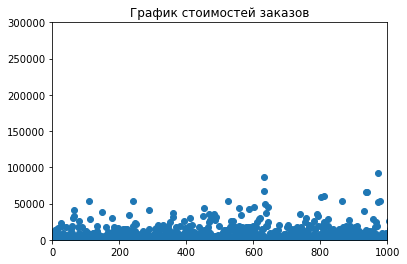

In [306]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1000, 0, 300000])
plt.title('График стоимостей заказов')
plt.show()

Стоимость большинства заказов не превышает 100000

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [307]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Заказы стоимостью выше 53904 будем рассматривать как аномалию

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

Подготовим данные для статистического теста

In [308]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1)

visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))

ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA'
]

ordersBDaily = (orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))

ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}), axis=1).sort_values(by=['date'])

ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB'
]

data = (
    ordersADaily.merge(
    ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [309]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))

ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))

ordersByUsersB.columns = ['userId', 'orders'] 

Создадим выборки, где каждый элемент — число заказов определённого пользователя

In [310]:
sampleA = pd.concat([ordersByUsersA['orders'],
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

Число элементов sampleA и sampleB — это количество пользователей. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке методом mean()

In [311]:
print('Конверсия группы A -', "{0:.3f}".format(sampleA.mean()))
print('Конверсия группы B -', "{0:.3f}".format(sampleB.mean()))

Конверсия группы A - 0.025
Конверсия группы B - 0.029


Проверяем распределение на нормальность методом `st.shapiro()`

Если уровень значимости (p-value) окажется меньше критического уровеня в 0.05, гипотеза о нормальности распределения ($H_0$) будет отвегрнута

$H_0$ - Данные подчиняются нормальному распределению

$H_1$ - Данные распределены не нормально

In [312]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sampleA)
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-value:', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-value: 0.0
Отвергаем нулевую гипотезу: распределение не нормально


Применим тест Уилкоксона-Манна-Уитни для подсчета статистической значимости различий в конверсии между группами.

Проверим двустороннюю (ненаправленную) гипотезу. Если уровень значимости (p-value) окажется меньше критического уровеня в 0.05, гипотеза о равенстве двух выборок ($H_0$) будет отвегрнута

$H_0$ - Отсутствует статистически значимое различие в конверсии между группами A и B

$H_1$ - Различие в конверсии между группами статистически значимо

In [313]:
print('p-value -', "{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB, alternative="two-sided")[1]))

print('Относительный прирост конверсии группы B -', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value - 0.011
Относительный прирост конверсии группы B - 0.160


p-value меньше 0.05. Значит, нулевую гипотезу можно отвергнуть, различие в конверсии между группами A и B статистически значимо

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Чтобы рассчитать статистическую значимость различий в среднем чеке между группами, применим статистический критерий Манна-Уитни к данным о выручке с заказов.

Проверим двустороннюю (ненаправленную) гипотезу. Если уровень значимости (p-value) окажется меньше критического уровеня в 0.05, гипотеза о равенстве двух выборок ($H_0$) будет отвегрнута

$H_0$ - Отсутствует статистически значимое различие в среднем чеке между группами A и B

$H_1$ - Различие в среднем чеке между группами статистически значимо

In [314]:
print('p-value -', '{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'],
orders[orders['group']=='B']['revenue'], alternative="two-sided")[1]))

print('Относительное различие в среднем чеке между группами -',
'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()
/orders[orders['group']=='A']['revenue'].mean()-1))

p-value - 0.829
Относительное различие в среднем чеке между группами - 0.287


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

Средний чек группы B на 29% больше

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным

In [315]:
# выделим аномальных пользователей
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
     ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis=0)

usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitorId']

# объединим аномальных пользователей в одной переменной
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values())

print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64
(16,)


In [316]:
# Подготовим выборки количества заказов по пользователям по группам

sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(
            data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(
            data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

Применим статистический критерий Манна-Уитни к полученным выборкам

Проверим двустороннюю (ненаправленную) гипотезу. Если уровень значимости (p-value) окажется меньше критического уровеня в 0.05, гипотеза о равенстве двух выборок ($H_0$) будет отвегрнута

$H_0$ - Отсутствует статистически значимое различие в конверсии между группами A и B

$H_1$ - Различие в конверсии между группами статистически значимо

In [317]:
print('p-value:', '{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative="two-sided")[1]))
print('Относительный прирост конверсии группы B:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.007
Относительный прирост конверсии группы B: 0.189


P-value почти не изменилось и все еще меньше 0.05. Значит, нулевую гипотезу можно отвергнуть, различие в конверсии между группами A и B статистически значимо

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Проверим двустороннюю (ненаправленную) гипотезу. Если уровень значимости (p-value) окажется меньше критического уровеня в 0.05, гипотеза о равенстве двух выборок ($H_0$) будет отвегрнута

$H_0$ - Отсутствует статистически значимое различие в среднем чеке между группами A и B

$H_1$ - Различие в среднем чеке между группами статистически значимо

In [318]:
print('p-value:', '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[np.logical_and(orders['group'] == 'A',
                   np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
            orders[np.logical_and(orders['group'] == 'B',
                   np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                        alternative="two-sided")[1]))

print('Относительное различие в среднем чеке между группами:',
    "{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
                   / orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value: 0.788
Относительное различие в среднем чеке между группами: -0.032


P-value немного снизилось, но все еще значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

Относительное различие в среднем чеке между группами почти исчезло

### Посмотрим на графики относительного изменения среднего чека и относительного прироста конверсии по «очищенным» данным

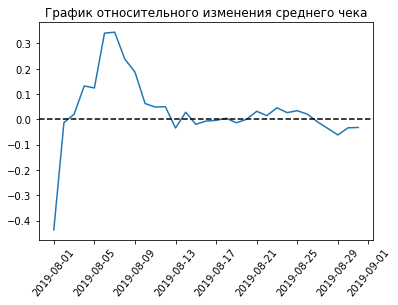

In [319]:
orders_filtered = orders[np.logical_not(orders['visitorId'].isin(abnormalUsers))]

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders_filtered[np.logical_and(orders_filtered['date'] <= x['date'], orders_filtered['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения среднего чека')
plt.xticks(rotation=50)
plt.show()

График различия среднего чека говорит о том, что результаты группы B стабилизируются и сейчас почти не отличаются от группы A

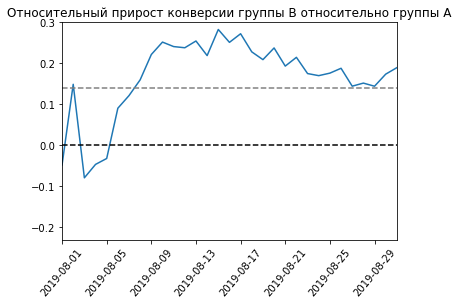

In [320]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('Относительный прирост конверсии группы B относительно группы A')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')

plt.axis([np.datetime64('2019-08-01'), np.datetime64('2019-08-31'), -0.23, 0.3])
plt.xticks(rotation=50)
plt.show()

График различия конверсии между группами сообщает, что результаты группы B лучше группы A и тенденция сохраняется

### Выводы

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. С учетом относительно равного среднего чека и более высокой конверсии, группа B будет и дальше показывать лучший результат по выручке.

В процессе проверки данных, было обнаружено некорректное разбиение пользователей на группы. Необходимо проверить механизмы разделения, используемые при сборе данных для A/B тестирования.